# Metadata

```
Course:   DS 5001
Module:   11 Lab
Topic:    Combine Lexicons
Author:   R.C. Alvarado

Purpose:  Collect all lexicons into a single database.
```

# Set Up

In [69]:
data_home = '../data'
lexicons = {}

In [130]:
import pandas as pd
import numpy as np
import re

# Bing

First, download RAR file from [here](http://sentiment.christopherpotts.net/lexicons.html#opinionlexicon).  Then open in a text editor and convert encoding and line endings in an editor.

In [71]:
bing_pos_file = f"{data_home}/salex/sources/opinion-lexicon-English/positive-words.txt"
bing_neg_file = f"{data_home}/salex/sources/opinion-lexicon-English/negative-words.txt"

In [72]:
bing_neg = pd.read_csv(bing_neg_file, skiprows=30, header=None, names=['term_str'])
bing_pos = pd.read_csv(bing_pos_file, skiprows=29, header=None, names=['term_str'])
bing_neg[['bing_positive','bing_negative']] = (0,1)
bing_pos[['bing_positive','bing_negative']] = (1,0)
bing = pd.concat([bing_neg, bing_pos]).set_index('term_str').sort_index()
bing['bing_sentiment'] = bing['bing_positive'] - bing['bing_negative']

In [73]:
bing.sort_values('bing_sentiment')

,bing_positive,bing_negative,bing_sentiment
term_str,,,
2-faced,0,1,-1
misinformed,0,1,-1
misinform,0,1,-1
mishap,0,1,-1
mishandle,0,1,-1
...,...,...,...
rightly,1,0,1
rightness,1,0,1
cure-all,1,0,1


In [74]:
bing.sum()

bing_positive     2006
bing_negative     4783
bing_sentiment   -2777
dtype: int64

In [75]:
bing[bing.index.duplicated()]

,bing_positive,bing_negative,bing_sentiment
term_str,,,
envious,1,0,1
enviously,1,0,1
enviousness,1,0,1


In [76]:
bing = bing[~bing.index.duplicated(keep='first')]

In [77]:
bing.index.is_unique

True

In [78]:
lexicons['bing'] = bing

# NRC

In [79]:
nrc_file = f"{data_home}/salex/sources/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

In [80]:
nrc = pd.read_csv(nrc_file, sep='\t', header=None)
nrc.columns = ['term_str','nrc_emotion','val']
nrc = nrc.set_index(['term_str','nrc_emotion'])
nrc = nrc.unstack()
nrc.columns = nrc.columns.droplevel(0)
nrc = nrc[nrc.sum(1) > 1]
nrc.columns = ['nrc_'+col for col in nrc.columns]

In [81]:
nrc.sum().sort_values(ascending=False)

nrc_negative        2366
nrc_fear            1368
nrc_positive        1281
nrc_anger           1208
nrc_sadness         1137
nrc_disgust         1004
nrc_trust            935
nrc_joy              686
nrc_anticipation     682
nrc_surprise         454
dtype: int64

In [82]:
nrc.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust
term_str,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abduction,0,0,0,1,0,1,0,1,1,0
aberration,0,0,1,0,0,1,0,0,0,0


In [83]:
nrc['nrc_polarity'] = nrc.nrc_positive - nrc.nrc_negative

In [84]:
nrc

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,nrc_polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [85]:
lexicons['nrc'] = nrc

# Syuzhet

In [86]:
syuzhet_file = f"{data_home}/salex/sources/Jockers/syuzhet.csv"

In [87]:
syu = pd.read_csv(syuzhet_file)
syu.columns = ['id','term_str','syu_sentiment']
syu = syu.drop('id', axis=1)
syu = syu.set_index('term_str')

In [88]:
syu.head()

,syu_sentiment
term_str,
abandon,-0.75
abandoned,-0.50
abandoner,-0.25
abandonment,-0.25
abandons,-1.00


In [89]:
syu = syu[~syu.index.duplicated()] # There are 2 instances of 'naive' for some reason

In [90]:
syu.index.is_unique

True

<AxesSubplot:xlabel='term_str'>

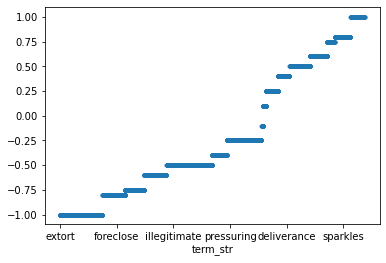

In [139]:
syu.syu_sentiment.sort_values().plot(style='.')

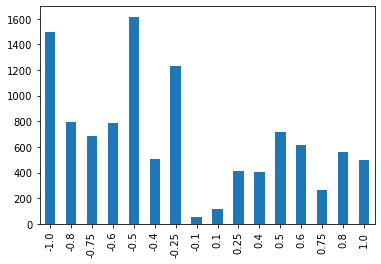

In [140]:
syu.syu_sentiment.value_counts().sort_index().plot.bar();

In [143]:
syu[np.abs(syu.syu_sentiment) == .1].sort_values('syu_sentiment').sample(10)

,syu_sentiment
term_str,
collectively,0.1
symmetrical,0.1
ejected,-0.1
lush,0.1
relating,0.1
nobility,0.1
ratified,0.1
veteran,0.1
languorous,-0.1


In [91]:
lexicons['syu'] = syu

# General Inquirer

This is prepared in a separate notebook.

In [92]:
gi_file = f"{data_home}/salex/sources/general-inquirer/gi_sent_mean.csv"
gi2_file = f"{data_home}/salex/sources/general-inquirer/gi_full.csv"

In [93]:
gi = pd.read_csv(gi_file, index_col=['term_str'])
gi.columns = ['gi_sentiment']

In [94]:
gi.head()

,gi_sentiment
term_str,
abandon,-1
abandonment,-1
abate,-1
abdicate,-1
abhor,-1


In [95]:
gi2 = pd.read_csv(gi2_file, index_col=['term_str','term_var'])

In [96]:
gi2.columns = ['gi_'+col.lower() for col in gi2.columns]

In [97]:
gi2

,,gi_positiv,gi_negativ,gi_pstv,gi_affil,gi_ngtv,gi_hostile,gi_strong,gi_power,gi_weak,gi_submit,...,gi_ptlw,gi_nation,gi_anomie,gi_negaff,gi_posaff,gi_surelw,gi_if,gi_notlw,gi_timespc,gi_formlw
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
a,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
abate,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abatement,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zenith,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zest,1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
gi2.index.duplicated().sum()

23

In [99]:
gi2

,,gi_positiv,gi_negativ,gi_pstv,gi_affil,gi_ngtv,gi_hostile,gi_strong,gi_power,gi_weak,gi_submit,...,gi_ptlw,gi_nation,gi_anomie,gi_negaff,gi_posaff,gi_surelw,gi_if,gi_notlw,gi_timespc,gi_formlw
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
a,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
abate,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abatement,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zenith,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zero,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zest,1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
lexicons['gi'] = gi
# lexicons['gi2'] = gi2

# LabMT

This is the lexicon used by Gallagher, et al. (of "The Geography of Happiness").

In [101]:
labmt_data = {}
labmt_features = "words scores".split()
for f in labmt_features:
    labmt_data[f] = open(f"{data_home}/salex/sources/labMT/labMT{f}-english.csv", 'r').readlines()
    labmt_data[f] = [x.strip() for x in labmt_data[f]]
    if 'scores' in f:
        labmt_data[f] = [float(x) for x in labmt_data[f]]
labmt = pd.DataFrame(labmt_data).set_index('words')
labmt.index.name = 'term_str'
labmt.columns = ['labmt_happiness']

In [102]:
lexicons['labmt'] = labmt

# Combine all

In [145]:
# lexicons

In [103]:
for lexicon in lexicons:
    if not lexicons[lexicon].index.is_unique:
        print(lexicon)

In [104]:
combo = pd.concat(lexicons.values(), axis=1)

In [105]:
combo

,bing_positive,bing_negative,bing_sentiment,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,nrc_polarity,syu_sentiment,gi_sentiment,labmt_happiness
term_str,,,,,,,,,,,,,,,,,
2-faced,0.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2-faces,0.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a+,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-0.5,-1.0,3.69
abolish,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-0.5,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
heartbreak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
tumors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.98
diseases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


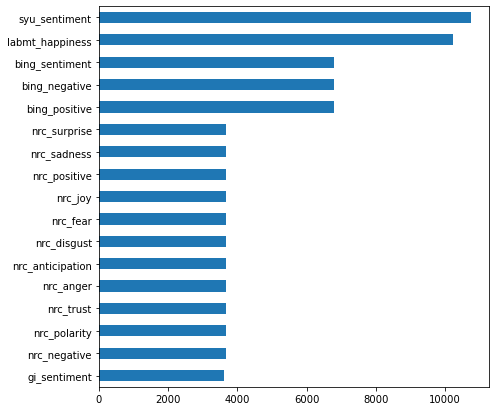

In [106]:
combo.count().sort_values().plot(kind='barh', figsize=(7,7));

# Save

In [107]:
nrc.to_csv(f'{data_home}/salex/salex_nrc.csv')
bing.to_csv(f'{data_home}/salex/salex_bing.csv')
syu.to_csv(f'{data_home}/salex/salex_syuzhet.csv')
gi.to_csv(f'{data_home}/salex/salex_gi.csv')
gi2.to_csv(f'{data_home}/salex/salex_gi2.csv')
labmt.to_csv(f'{data_home}/salex/salex_labmt.csv')
combo.to_csv(f'{data_home}/salex/salex_combo.csv')       